# WeatherPy
----

### Analysis
* Maximum temperature is greatest at the equator but the  maximum temperatures in northern and southern hemispheres shift seasonally, which is depicted in scatter plot.  Southern hemisphere appears significantly warmer this time of year.
* Humidity and rain (100% humidity) appears more evenly distributed over both latitudes.  In the humidity plot, it appears the cities along the equator appear primarily either very high humidity or none.
* Cloudiness has no relationship to latitude in this scatterplot.
* Wind speed appears to have limited relationship to latitude, with the exception in this scatter plot of higher speeds at the extreme ends of southern and northern latitudes; particularly in the northern, which may have relationship to seasonality and being more distant from the sun.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
# import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [66]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


630

In [67]:
print(lat_lngs)

In [68]:
len(lats)

1500

In [69]:
len(lngs)

1500

In [70]:
coordinates_df = pd.DataFrame({'Latitude': lats, 'Longitude': lngs})
coordinates_df.tail()

,Latitude,Longitude
1495,66.546007,-120.071204
1496,14.232739,-141.586912
1497,-73.285453,91.902676
1498,-31.233275,99.900882
1499,-16.876186,136.691402


In [71]:
cities_df = pd.DataFrame({'City': cities})
cities_df.tail()

,City
625,lompoc
626,eureka
627,bose
628,tigil
629,ngukurr


In [72]:
#Set up City as first column of future full dataframe
cities_weather = cities_df.copy()
cities_weather.head()

,City
0,emmen
1,albany
2,port elizabeth
3,zapolyarnyy
4,arraial do cabo


In [73]:
#set up additional columns in dataframe
cities_weather ['Country'] = ""
cities_weather ['Date'] = ""
cities_weather ['Latitude'] = ""
cities_weather ['Longitude'] = ""
cities_weather ['Cloudiness'] = ""
cities_weather ['Max_Temp'] = ""
cities_weather ['Humidity'] = ""
cities_weather ['Wind_Speed'] = ""

cities_weather.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,emmen,,,,,,,,
1,albany,,,,,,,,
2,port elizabeth,,,,,,,,
3,zapolyarnyy,,,,,,,,
4,arraial do cabo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [74]:
# import openweathermapy.core as owm
# Set up base url and define units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Query url
query_url = f"{url}appid={api_key}&units={units}&q="

# use iterrows to iterate through pandas dataframe
for index, row in cities_weather.iterrows():
    print(index)

    cityrow = row['City']
    
    try:
        response = requests.get(query_url + cityrow).json()
        pprint(response)

        results = response

        cities_weather.loc[index, 'Country'] = results['sys']['country']
        cities_weather.loc[index, 'Date'] = results['dt']
        cities_weather.loc[index, 'Latitude'] = results['coord']['lat']
        cities_weather.loc[index, 'Longitude'] = results['coord']['lon']
        cities_weather.loc[index, 'Cloudiness'] = results['clouds']['all']
        cities_weather.loc[index, 'Max_Temp'] = results['main']['temp_max']
        cities_weather.loc[index, 'Humidity'] = results['main']['humidity']
        cities_weather.loc[index, 'Wind_Speed'] = results['wind']['speed']
        print()
        
    except (KeyError, IndexError):
        print("Data not found... skipping.")
        print("------------")


0
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 52.79, 'lon': 6.89},
 'dt': 1554348215,
 'id': 2756136,
 'main': {'humidity': 93,
          'pressure': 999,
          'temp': 41.27,
          'temp_max': 44.01,
          'temp_min': 37.99},
 'name': 'Emmen',
 'sys': {'country': 'NL',
         'id': 1530,
         'message': 0.0065,
         'sunrise': 1554354013,
         'sunset': 1554401429,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 3.36}}

1
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1554347825,
 'id': 5106834,
 'main': {'humidity': 32,
          'pressure': 1022,
          'temp': 37.15,
          'temp_max': 39.99,
          'temp_min': 33.01},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'messag

{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
15
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
16
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 62.16, 'lon': -7.17},
 'dt': 1554346200,
 'id': 2610343,
 'main': {'humidity': 100,
          'pressure': 1012,
          'temp': 37.4,
          'temp_max': 37.4,
          'temp_min': 37.4},
 'name': 'Vestmanna',
 'sys': {'country': 'FO',
         'id': 1596,
         'message': 0.0039,
         'sunrise': 1554356493,
         'sunset': 1554405697,
         'type': 1},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 5.82}}

17
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -34.53, 'lon': 20.04},
 'dt': 1554346800,
 'id': 1015776,
 'main': {'humidity': 82,
          'pressure': 1008,
          

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -7.37, 'lon': 108.54},
 'dt': 1554348230,
 'id': 1650233,
 'main': {'grnd_level': 975.27,
          'humidity': 74,
          'pressure': 1012.44,
          'sea_level': 1012.44,
          'temp': 81.36,
          'temp_max': 81.36,
          'temp_min': 81.36},
 'name': 'Banjar',
 'sys': {'country': 'ID',
         'message': 0.0084,
         'sunrise': 1554331699,
         'sunset': 1554374962},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 185.501, 'speed': 3.62}}

33
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 63.75, 'lon': -68.52},
 'dt': 1554347523,
 'id': 5983720,
 'main': {'humidity': 64,
          'pressure': 1012,
          'temp': -2.12,
          'temp_max': -2.01,
          'temp_min': -2.21},
 'name': 'Iqaluit',
 'sys': {'country': 'CA',
         'id': 797,
   

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 15.34, 'lon': 74.49},
 'dt': 1554343200,
 'id': 1273574,
 'main': {'humidity': 94,
          'pressure': 1016,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Vaini',
 'sys': {'country': 'IN',
         'id': 9229,
         'message': 0.0032,
         'sunrise': 1554339329,
         'sunset': 1554383672,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 144.001, 'speed': 3.18}}

48
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -25.3, 'lon': 152.85},
 'dt': 1554347719,
 'id': 2146219,
 'main': {'humidity': 51,
          'pressure': 1021,
          'temp': 81.97,
          'temp_max': 84,
          'temp_min': 80.6},
 'name': 'Hervey Bay',
 'sys': {'country': 'AU',
         'id': 9501,
         'message': 0.

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.62, 'lon': -77.74},
 'dt': 1554348015,
 'id': 4372777,
 'main': {'humidity': 27,
          'pressure': 1025,
          'temp': 46.22,
          'temp_max': 53.6,
          'temp_min': 39},
 'name': 'Vardo',
 'sys': {'country': 'US',
         'id': 4360,
         'message': 0.007,
         'sunrise': 1554288731,
         'sunset': 1554334561,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 8.05}}

63
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 1.51, 'lon': 21.07},
 'dt': 1554348239,
 'id': 218229,
 'main': {'grnd_level': 961.91,
          'humidity': 98,
          'pressure': 1007.64,
          'sea_level': 1007.64,
          'temp': 72.09,
          'temp_max': 72.09,
          'temp_min': 72.09},
 'name': 'Bongandanga',
 'ra

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -12.7, 'lon': -38.32},
 'dt': 1554346800,
 'id': 3468031,
 'main': {'humidity': 83,
          'pressure': 1012,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Camacari',
 'sys': {'country': 'BR',
         'id': 8454,
         'message': 0.0033,
         'sunrise': 1554367069,
         'sunset': 1554410069,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 4.7}}

76
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -21.21, 'lon': -159.78},
 'dt': 1554346800,
 'id': 4035715,
 'main': {'humidity': 74,
          'pressure': 1011,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Avarua',
 'sys': {'country': 'CK',
         'id': 7271,
         'message': 0

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 52.47, 'lon': 96.11},
 'dt': 1554348246,
 'id': 1489401,
 'main': {'grnd_level': 863.43,
          'humidity': 59,
          'pressure': 1019.24,
          'sea_level': 1019.24,
          'temp': 29.97,
          'temp_max': 29.97,
          'temp_min': 29.97},
 'name': 'Toora-Khem',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1554332658,
         'sunset': 1554379968},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 73.5015, 'speed': 2.73}}

90
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
91
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.72, 'lon': -102.64},
 'dt': 1554348019,
 'id': 5530452,
 'main': {'humidity': 21,
          'pressure': 1014,
          'temp': 64.26,
          'temp_max': 68,
          't

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 69.47, 'lon': 25.52},
 'dt': 1554346200,
 'id': 779350,
 'main': {'humidity': 74,
          'pressure': 1012,
          'temp': 28.4,
          'temp_max': 28.4,
          'temp_min': 28.4},
 'name': 'Karasjok',
 'sys': {'country': 'NO',
         'id': 1646,
         'message': 0.0036,
         'sunrise': 1554347441,
         'sunset': 1554399061,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 13.87}}

105
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -5.2, 'lon': -35.46},
 'dt': 1554346800,
 'id': 3386213,
 'main': {'humidity': 94,
          'pressure': 1011,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Touros',
 'sys': {'country': 'BR',
         'id': 8452,
         'message':

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 49.49, 'lon': 105.92},
 'dt': 1554348254,
 'id': 2031964,
 'main': {'grnd_level': 909.27,
          'humidity': 52,
          'pressure': 1023.08,
          'sea_level': 1023.08,
          'temp': 34.29,
          'temp_max': 34.29,
          'temp_min': 34.29},
 'name': 'Darhan',
 'sys': {'country': 'MN',
         'message': 0.0047,
         'sunrise': 1554330503,
         'sunset': 1554377415},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 42.5015, 'speed': 8.32}}

118
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -42.88, 'lon': 147.33},
 'dt': 1554347957,
 'id': 2163355,
 'main': {'humidity': 44,
          'pressure': 1035,
          'temp': 62.19,
          'temp_max': 64.99,
          'temp_min': 59},
 'name': 'Hobart',
 'sys': {'country': 'AU',
         'id': 9545,
       

 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1554346200,
 'id': 3423146,
 'main': {'humidity': 78,
          'pressure': 1017,
          'temp': 17.6,
          'temp_max': 17.6,
          'temp_min': 17.6},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
         'message': 0.0056,
         'sunrise': 1554365828,
         'sunset': 1554417444,
         'type': 1},
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 140, 'speed': 17.22}}

132
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -34.58, 'lon': 150.85},
 'dt': 1554348125,
 'id': 6255012,
 'main': {'humidity': 72,
          'pressure': 1030,
          'temp': 68.7,
          'temp_max': 72,
          'temp_min': 66},
 'name': 'Flinders',
 'sys': {'country': 'AU',
         'id': 9594,
         'message': 0.0039,
         'sunrise': 1554322235,
         'sunset': 1554364121,

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 32.27, 'lon': 73.82},
 'dt': 1554346800,
 'id': 1167064,
 'main': {'humidity': 53,
          'pressure': 1012,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Alipur Chatha',
 'sys': {'country': 'PK',
         'id': 7594,
         'message': 0.0039,
         'sunrise': 1554338986,
         'sunset': 1554384336,
         'type': 1},
 'visibility': 4000,
 'weather': [{'description': 'smoke',
              'icon': '50d',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'deg': 130, 'speed': 4.7}}

148
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 36.7, 'lon': 45.14},
 'dt': 1554348263,
 'id': 121110,
 'main': {'grnd_level': 817.67,
          'humidity': 92,
          'pressure': 1018.72,
          'sea_level': 1018.72,
          'temp': 31.5,
          'temp_max': 31.5,
          'temp_min': 31.5},
 'name': 'Piranshahr',
 's

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.95, 'lon': -94.76},
 'dt': 1554348050,
 'id': 4407665,
 'main': {'humidity': 66,
          'pressure': 1018,
          'temp': 52.86,
          'temp_max': 54,
          'temp_min': 51.01},
 'name': 'Kodiak',
 'sys': {'country': 'US',
         'id': 5924,
         'message': 0.0042,
         'sunrise': 1554292798,
         'sunset': 1554338663,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'gust': 11.3, 'speed': 13.87}}

163
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -4.58, 'lon': -81.27},
 'dt': 1554348134,
 'id': 3691582,
 'main': {'grnd_level': 998.47,
          'humidity': 74,
          'pressure': 1013.24,
          'sea_level': 1013.24,
          'temp': 74.88,
          'temp_max': 74.88,
          'temp_min': 74.88},

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -38.37, 'lon': 178.3},
 'dt': 1554348272,
 'id': 2180991,
 'main': {'grnd_level': 1000.95,
          'humidity': 81,
          'pressure': 1021.08,
          'sea_level': 1021.08,
          'temp': 60.93,
          'temp_max': 60.93,
          'temp_min': 60.93},
 'name': 'Tolaga Bay',
 'sys': {'country': 'NZ',
         'message': 0.0035,
         'sunrise': 1554315765,
         'sunset': 1554357418},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 157.501, 'speed': 9.55}}

178
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
179
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
180
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -4.34, 'lon': 152.27},
 'dt': 1554348272,
 'id': 2093685,
 'main': {'grnd_level': 99

          'temp_max': 39,
          'temp_min': 33.01},
 'name': 'Souillac',
 'sys': {'country': 'FR',
         'id': 6452,
         'message': 0.0035,
         'sunrise': 1554356255,
         'sunset': 1554402782,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270.501, 'speed': 6.2}}

192
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 52.52, 'lon': 6.43},
 'dt': 1554348255,
 'id': 2754861,
 'main': {'humidity': 100,
          'pressure': 999,
          'temp': 39.72,
          'temp_max': 43,
          'temp_min': 36},
 'name': 'Ommen',
 'sys': {'country': 'NL',
         'id': 1526,
         'message': 0.0065,
         'sunrise': 1554354143,
         'sunset': 1554401520,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'speed': 2.24}

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.93, 'lon': 28.61},
 'dt': 1554348326,
 'id': 708057,
 'main': {'grnd_level': 990.79,
          'humidity': 77,
          'pressure': 1022.28,
          'sea_level': 1022.28,
          'temp': 23.76,
          'temp_max': 23.76,
          'temp_min': 23.76},
 'name': 'Hryshkivtsi',
 'sys': {'country': 'UA',
         'message': 0.0038,
         'sunrise': 1554349003,
         'sunset': 1554396016},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 116.001, 'speed': 3.62}}

206
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
207
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -37.33, 'lon': -59.14},
 'dt': 1554347664,
 'id': 3427833,
 'main': {'humidity': 74,
          'pressure': 984,
          'temp': 57,
          'temp_max': 57,
          'temp_min': 

          'temp_max': 72.99,
          'temp_min': 72.99},
 'name': 'Viedma',
 'sys': {'country': 'AR',
         'message': 0.003,
         'sunrise': 1554373800,
         'sunset': 1554415178},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 256.501, 'speed': 15.7}}

222
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 4.81, 'lon': 18.11},
 'dt': 1554346800,
 'id': 2388720,
 'main': {'humidity': 94,
          'pressure': 1007,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Boali',
 'sys': {'country': 'CF',
         'id': 2037,
         'message': 0.0031,
         'sunrise': 1554353115,
         'sunset': 1554396943,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}


{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 30.98, 'lon': -110.3},
 'dt': 1554348274,
 'id': 4015700,
 'main': {'humidity': 24,
          'pressure': 1020,
          'temp': 58.91,
          'temp_max': 62.01,
          'temp_min': 55.99},
 'name': 'Cananea',
 'sys': {'country': 'MX',
         'id': 4096,
         'message': 0.0039,
         'sunrise': 1554296856,
         'sunset': 1554342062,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 6.93}}

236
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 54.28, 'lon': -0.41},
 'dt': 1554348182,
 'id': 2638419,
 'main': {'humidity': 100,
          'pressure': 995,
          'temp': 36.57,
          'temp_max': 37.99,
          'temp_min': 35.01},
 'name': 'Scarborough',
 'rain': {'1h': 0.25},
 'sys': {'country': 'GB',
         'id

251
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -24.93, 'lon': -65.37},
 'dt': 1554346800,
 'id': 3838233,
 'main': {'humidity': 93,
          'pressure': 1012,
          'temp': 67.21,
          'temp_max': 68,
          'temp_min': 66.2},
 'name': 'Humaita',
 'sys': {'country': 'AR',
         'id': 8267,
         'message': 0.0032,
         'sunrise': 1554373872,
         'sunset': 1554416248,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 3.36}}

252
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -46.28, 'lon': 169.85},
 'dt': 1554348180,
 'id': 2208248,
 'main': {'humidity': 84,
          'pressure': 1021,
          'temp': 51.01,
          'temp_max': 51.01,
          'temp_min': 51.01},
 'name': 'Kaitangata',
 'rain': {'3h': 1.9675},
 'sys': {'country': 'NZ',
   

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.73, 'lon': 8.83},
 'dt': 1554348266,
 'id': 3139597,
 'main': {'humidity': 93,
          'pressure': 1012,
          'temp': 36.77,
          'temp_max': 37.4,
          'temp_min': 36},
 'name': 'Sistranda',
 'sys': {'country': 'NO',
         'id': 1647,
         'message': 0.0045,
         'sunrise': 1554352455,
         'sunset': 1554402057,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 4.7}}

266
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 9.03, 'lon': 38.85},
 'dt': 1554348345,
 'id': 344979,
 'main': {'grnd_level': 768.07,
          'humidity': 93,
          'pressure': 1014.32,
          'sea_level': 1014.32,
          'temp': 51.93,
          'temp_max': 51.93,
          'temp_min': 51.93},
 'name': 'Ayat',
 '

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 43.42, 'lon': -4.75},
 'dt': 1554348332,
 'id': 3118304,
 'main': {'humidity': 81,
          'pressure': 1011,
          'temp': 41.9,
          'temp_max': 46.99,
          'temp_min': 39.99},
 'name': 'Llanes',
 'rain': {'3h': 0.6925},
 'snow': {'3h': 0.4275},
 'sys': {'country': 'ES',
         'id': 2016711,
         'message': 0.0042,
         'sunrise': 1554357362,
         'sunset': 1554403667,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 261.001, 'speed': 3.51}}

279
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 71, 'lon': 24.66},
 'dt': 1554346200,
 'id': 779622,
 'main': {'humidity': 74,
          'pressure': 1012,
          'temp': 28.4,
          'temp_max': 28.4,
          'temp_min': 28.4},
 'name': 'Havoysund',
 'sys': {'country': 'NO',
         'i

{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
293
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -45.87, 'lon': 170.5},
 'dt': 1554347802,
 'id': 2191562,
 'main': {'humidity': 73,
          'pressure': 1022,
          'temp': 57,
          'temp_max': 57,
          'temp_min': 57},
 'name': 'Dunedin',
 'rain': {'3h': 0.265},
 'sys': {'country': 'NZ',
         'id': 75281,
         'message': 0.0037,
         'sunrise': 1554317918,
         'sunset': 1554359008,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 220, 'gust': 9.83, 'speed': 15.01}}

294
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.74, 'lon': 7.39},
 'dt': 1554348063,
 'id': 2447513,
 'main': {'grnd_level': 956.55,
          'humidity': 32,
          'pressure': 1007.84,
          'sea_level': 1007.84,
     

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.66, 'lon': -114.14},
 'dt': 1554348343,
 'id': 5939210,
 'main': {'humidity': 48,
          'pressure': 1003,
          'temp': 45.5,
          'temp_max': 46.99,
          'temp_min': 42.8},
 'name': 'Didsbury',
 'sys': {'country': 'CA',
         'id': 763,
         'message': 0.0046,
         'sunrise': 1554296831,
         'sunset': 1554343930,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 11.41}}

309
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.09, 'lon': 120.35},
 'dt': 1554343200,
 'id': 1797929,
 'main': {'humidity': 47,
          'pressure': 1019,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Qingdao',
 'sys': {'country': 'CN',
         'id': 9657,
         'message':

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -8.15, 'lon': -78.17},
 'dt': 1554348363,
 'id': 3692072,
 'main': {'grnd_level': 690.55,
          'humidity': 99,
          'pressure': 1012.64,
          'sea_level': 1012.64,
          'temp': 46.71,
          'temp_max': 46.71,
          'temp_min': 46.71},
 'name': 'Santiago de Chuco',
 'sys': {'country': 'PE',
         'message': 0.0035,
         'sunrise': 1554290129,
         'sunset': 1554333369},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 293.501, 'speed': 0.38}}

322
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -3.44, 'lon': 10.65},
 'dt': 1554348364,
 'id': 2399001,
 'main': {'grnd_level': 998.55,
          'humidity': 100,
          'pressure': 1009.2,
          'sea_level': 1009.2,
          'temp': 73.98,
          'temp_max': 73.98,
          'temp_min': 

          'temp_min': 75.2},
 'name': 'Grand Gaube',
 'sys': {'country': 'MU',
         'id': 2061,
         'message': 0.006,
         'sunrise': 1554344210,
         'sunset': 1554386868,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 320, 'speed': 3.36}}

335
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 35.74, 'lon': 139.53},
 'dt': 1554348321,
 'id': 1850144,
 'main': {'humidity': 24,
          'pressure': 1013,
          'temp': 57.97,
          'temp_max': 62.01,
          'temp_min': 55.4},
 'name': 'Nishihara',
 'sys': {'country': 'JP',
         'id': 8063,
         'message': 0.0044,
         'sunrise': 1554323104,
         'sunset': 1554368684,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'C

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 34.92, 'lon': 32.53},
 'dt': 1554347799,
 'id': 146639,
 'main': {'humidity': 87,
          'pressure': 1013,
          'temp': 50.58,
          'temp_max': 53.6,
          'temp_min': 45},
 'name': 'Lasa',
 'rain': {'1h': 0.25},
 'sys': {'country': 'CY',
         'id': 6374,
         'message': 0.0041,
         'sunrise': 1554348790,
         'sunset': 1554394347,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 30, 'speed': 9.17}}

350
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -2.54, 'lon': 115.51},
 'dt': 1554348372,
 'id': 1641899,
 'main': {'grnd_level': 985.91,
          'humidity': 68,
          'pressure': 1011.16,
          'sea_level': 1011.16,
          'temp': 86.85,
          'temp_max': 86.85,
          'temp_min': 86.85},
 'na

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 69.41, 'lon': 30.21},
 'dt': 1554346200,
 'id': 522260,
 'main': {'humidity': 92,
          'pressure': 1009,
          'temp': 30.2,
          'temp_max': 30.2,
          'temp_min': 30.2},
 'name': 'Nikel',
 'sys': {'country': 'NO',
         'id': 1639,
         'message': 0.0045,
         'sunrise': 1554346333,
         'sunset': 1554397918,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 360, 'speed': 17.22}}

363
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.4, 'lon': 55.99},
 'dt': 1554348378,
 'id': 118994,
 'main': {'grnd_level': 843.03,
          'humidity': 79,
          'pressure': 1016.4,
          'sea_level': 1016.4,
          'temp': 48.33,
          'temp_max': 48.33,
          'temp_min': 48.33},
 'name': 'Rafsanjan',
 'sys':

{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
377
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 48.76, 'lon': -80.69},
 'dt': 1554344520,
 'id': 5984000,
 'main': {'humidity': 73,
          'pressure': 1020,
          'temp': 19.4,
          'temp_max': 19.4,
          'temp_min': 19.4},
 'name': 'Iroquois Falls',
 'sys': {'country': 'CA',
         'id': 940,
         'message': 0.0043,
         'sunrise': 1554288994,
         'sunset': 1554335714,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 6.93}}

378
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 32.56, 'lon': -97.14},
 'dt': 1554348375,
 'id': 4709013,
 'main': {'humidity': 63,
          'pressure': 1017,
          'temp': 63.57,
          'temp_max': 64.99,
          'te

{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
392
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 21.92, 'lon': 77.9},
 'dt': 1554348389,
 'id': 1276389,
 'main': {'grnd_level': 953.91,
          'humidity': 29,
          'pressure': 1011.68,
          'sea_level': 1011.68,
          'temp': 85.23,
          'temp_max': 85.23,
          'temp_min': 85.23},
 'name': 'Betul',
 'sys': {'country': 'IN',
         'message': 0.0029,
         'sunrise': 1554338333,
         'sunset': 1554383032},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 193.501, 'speed': 4.97}}

393
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -13.85, 'lon': 136.42},
 'dt': 1554343200,
 'id': 2079582,
 'main': {'humidity': 70,
          'pressure': 1011,
          'temp': 87.8,
          'temp_max': 87.8,
          'temp_min': 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 58.09, 'lon': 6.8},
 'dt': 1554348296,
 'id': 3157799,
 'main': {'humidity': 73,
          'pressure': 1001,
          'temp': 44.58,
          'temp_max': 46,
          'temp_min': 43},
 'name': 'Farsund',
 'rain': {'3h': 0.0025000000000004},
 'sys': {'country': 'NO',
         'id': 2008816,
         'message': 0.0049,
         'sunrise': 1554353593,
         'sunset': 1554401893,
         'type': 3},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'gust': 11.62, 'speed': 15.01}}

408
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 21.53, 'lon': -78.23},
 'dt': 1554342600,
 'id': 3558771,
 'main': {'humidity': 88,
          'pressure': 1021,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Florida',
 'sys': {'country': 'CU',
         'id': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.16, 'lon': 82.38},
 'dt': 1554348407,
 'id': 1268677,
 'main': {'grnd_level': 1000.31,
          'humidity': 60,
          'pressure': 1010.76,
          'sea_level': 1010.76,
          'temp': 82.26,
          'temp_max': 82.26,
          'temp_min': 82.26},
 'name': 'Kadipur',
 'sys': {'country': 'IN',
         'message': 0.0031,
         'sunrise': 1554337134,
         'sunset': 1554382081},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 81.5015, 'speed': 5.86}}

421
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
422
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 58.29, 'lon': 43.89},
 'dt': 1554348407,
 'id': 522353,
 'main': {'grnd_level': 1010.71,
          'humidity': 62,
          'pressure': 1028.28,
          'sea_level': 1028.28,
      

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.12, 'lon': -5.53},
 'dt': 1554348311,
 'id': 2640377,
 'main': {'humidity': 93,
          'pressure': 991,
          'temp': 42.64,
          'temp_max': 44.01,
          'temp_min': 41},
 'name': 'Penzance',
 'sys': {'country': 'GB',
         'id': 1393,
         'message': 0.0061,
         'sunrise': 1554357172,
         'sunset': 1554404231,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 270, 'speed': 16.11}}

436
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -15.19, 'lon': 12.15},
 'dt': 1554348114,
 'id': 3347019,
 'main': {'grnd_level': 1003.91,
          'humidity': 100,
          'pressure': 1007.72,
          'sea_level': 1007.72,
          'temp': 78.21,
          'temp_max': 78.21,
          'temp_min': 78.21},
 'name': 'Namibe',

              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 11.41}}

449
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 7.45, 'lon': 126.58},
 'dt': 1554348415,
 'id': 1729469,
 'main': {'grnd_level': 987.43,
          'humidity': 72,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 83.7,
          'temp_max': 83.7,
          'temp_min': 83.7},
 'name': 'Baculin',
 'sys': {'country': 'PH',
         'message': 0.0035,
         'sunrise': 1554327028,
         'sunset': 1554370975},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 9.50146, 'speed': 8.66}}

450
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.06, 'lon': -83.43},
 'dt': 1554348358,
 'id': 4984075,
 'main': {'humidity': 68,
          'pressure': 1026,
          'temp': 29.84,
          'te

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -21.55, 'lon': 167.88},
 'dt': 1554348419,
 'id': 2138285,
 'main': {'grnd_level': 1012.07,
          'humidity': 92,
          'pressure': 1012.72,
          'sea_level': 1012.72,
          'temp': 81,
          'temp_max': 81,
          'temp_min': 81},
 'name': 'Tadine',
 'sys': {'country': 'NC',
         'message': 0.004,
         'sunrise': 1554317791,
         'sunset': 1554360393},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 116.501, 'speed': 7.09}}

464
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 39.98, 'lon': 41.67},
 'dt': 1554346200,
 'id': 302824,
 'main': {'humidity': 93,
          'pressure': 1015,
          'temp': 35.6,
          'temp_max': 35.6,
          'temp_min': 35.6},
 'name': 'Pasinler',
 'sys': {'country': 'TR',
         'id': 6992,
         'mess

476
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 16.28, 'lon': -0.04},
 'dt': 1554348424,
 'id': 2457163,
 'main': {'grnd_level': 973.91,
          'humidity': 33,
          'pressure': 1005.32,
          'sea_level': 1005.32,
          'temp': 76.23,
          'temp_max': 76.23,
          'temp_min': 76.23},
 'name': 'Gao',
 'sys': {'country': 'ML',
         'message': 0.0032,
         'sunrise': 1554357183,
         'sunset': 1554401586},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 141.001, 'speed': 3.18}}

477
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.29, 'lon': 97.04},
 'dt': 1554348151,
 'id': 1528998,
 'main': {'grnd_level': 844.95,
          'humidity': 37,
          'pressure': 1021.32,
          'sea_level': 1021.32,
          'temp': 54.27,
          'temp_max': 54.27,
          'temp_min': 54.27},
 'name': 'Yu

{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
492
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.45, 'lon': 39.03},
 'dt': 1554348046,
 'id': 527968,
 'main': {'humidity': 92,
          'pressure': 1019,
          'temp': 33.19,
          'temp_max': 37,
          'temp_min': 30.2},
 'name': 'Medvedovskaya',
 'sys': {'country': 'RU',
         'id': 8963,
         'message': 0.0033,
         'sunrise': 1554346764,
         'sunset': 1554393254,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 4.47}}

493
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 38.02, 'lon': -8.69},
 'dt': 1554347774,
 'id': 2263458,
 'main': {'humidity': 81,
          'pressure': 1007,
          'temp': 46.44,
          'temp_max': 50,
          'temp_min': 42.8},

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 42.46, 'lon': 59.61},
 'dt': 1554346800,
 'id': 601294,
 'main': {'humidity': 75,
          'pressure': 1022,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Nukus',
 'sys': {'country': 'UZ',
         'id': 9010,
         'message': 0.0039,
         'sunrise': 1554341980,
         'sunset': 1554388162,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'speed': 9.17}}

508
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 28.97, 'lon': 118.86},
 'dt': 1554348432,
 'id': 1797264,
 'main': {'grnd_level': 982.47,
          'humidity': 93,
          'pressure': 1020.28,
          'sea_level': 1020.28,
          'temp': 55.44,
          'temp_max': 55.44,
          'temp_min': 55.44},
 'name': 'Quzhou',
 'sys

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 64.52, 'lon': 34.76},
 'dt': 1554348436,
 'id': 577922,
 'main': {'grnd_level': 1015.67,
          'humidity': 79,
          'pressure': 1017.84,
          'sea_level': 1017.84,
          'temp': 31.41,
          'temp_max': 31.41,
          'temp_min': 31.41},
 'name': 'Belomorsk',
 'sys': {'country': 'RU',
         'message': 0.0041,
         'sunrise': 1554346134,
         'sunset': 1554395934},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 220.501, 'speed': 9.89}}

522
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -25.77, 'lon': 29.46},
 'dt': 1554348436,
 'id': 976361,
 'main': {'grnd_level': 851.27,
          'humidity': 91,
          'pressure': 1016.56,
          'sea_level': 1016.56,
          'temp': 48.87,
          'temp_max': 48.87,
          'temp_min': 48.87},
 

------------
538
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 0.56, 'lon': 12.85},
 'dt': 1554348441,
 'id': 2399371,
 'main': {'grnd_level': 963.19,
          'humidity': 98,
          'pressure': 1008.56,
          'sea_level': 1008.56,
          'temp': 71.1,
          'temp_max': 71.1,
          'temp_min': 71.1},
 'name': 'Makokou',
 'sys': {'country': 'GA',
         'message': 0.004,
         'sunrise': 1554354478,
         'sunset': 1554398104},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 249.501, 'speed': 2.39}}

539
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.19, 'lon': -82.53},
 'dt': 1554348062,
 'id': 4231997,
 'main': {'humidity': 66,
          'pressure': 1028,
          'temp': 52.92,
          'temp_max': 57.2,
          'temp_min': 50},
 'name': 'Avera',
 'sys': {'country': 'US',
         'id': 2827,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 52.12, 'lon': 9.98},
 'dt': 1554348303,
 'id': 2803461,
 'main': {'humidity': 100,
          'pressure': 1000,
          'temp': 40.41,
          'temp_max': 43,
          'temp_min': 37.99},
 'name': 'Marienburg',
 'sys': {'country': 'DE',
         'id': 1276,
         'message': 0.0041,
         'sunrise': 1554353321,
         'sunset': 1554400639,
         'type': 1},
 'visibility': 5000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 210, 'speed': 3.36}}

552
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 66.15, 'lon': -65.72},
 'dt': 1554348445,
 'id': 6096551,
 'main': {'grnd_level': 992.47,
          'humidity': 57,
          'pressure': 1012.12,
          'sea_level': 1012.12,
          'temp': -6.4,
          'temp_max': -6.4,
          'temp_min'

          'temp': 26.6,
          'temp_max': 26.6,
          'temp_min': 26.6},
 'name': 'Berlevag',
 'sys': {'country': 'NO',
         'id': 1633,
         'message': 0.0042,
         'sunrise': 1554346248,
         'sunset': 1554398540,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 10.29}}

565
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.35, 'lon': -65.33},
 'dt': 1554348449,
 'id': 3625066,
 'main': {'grnd_level': 1004.15,
          'humidity': 71,
          'pressure': 1014.12,
          'sea_level': 1014.12,
          'temp': 77.76,
          'temp_max': 77.76,
          'temp_min': 77.76},
 'name': 'Zaraza',
 'sys': {'country': 'VE',
         'message': 0.0032,
         'sunrise': 1554286657,
         'sunset': 1554330680},
 'weather': [{'description': 'clear sky',
              'icon

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.42, 'lon': -6.55},
 'dt': 1554348130,
 'id': 2737599,
 'main': {'grnd_level': 933.91,
          'humidity': 90,
          'pressure': 1008.72,
          'sea_level': 1008.72,
          'temp': 30.6,
          'temp_max': 30.6,
          'temp_min': 30.6},
 'name': 'Saldanha',
 'sys': {'country': 'PT',
         'message': 0.0036,
         'sunrise': 1554357889,
         'sunset': 1554404004},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 274.501, 'speed': 4.63}}

581
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.73, 'lon': -25.67},
 'dt': 1554348325,
 'id': 3372783,
 'main': {'humidity': 76,
          'pressure': 1026,
          'temp': 55.18,
          'temp_max': 55.4,
          'temp_min': 55},
 'name': 'Ponta Delgada',
 'sys': {'country': 'PT',
         'id': 6899,
         '

 'main': {'humidity': 82,
          'pressure': 1017,
          'temp': 55.51,
          'temp_max': 59,
          'temp_min': 52},
 'name': 'Half Moon Bay',
 'sys': {'country': 'US',
         'id': 4322,
         'message': 0.0089,
         'sunrise': 1554299532,
         'sunset': 1554345207,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 4.7}}

596
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -8.75, 'lon': -63.87},
 'dt': 1554346800,
 'id': 3662762,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Porto Velho',
 'sys': {'country': 'BR',
         'id': 8424,
         'message': 0.0041,
         'sunrise': 1554286711,
         'sunset': 1554329925,
         'type': 1},
 'visibility': 10000,
 'weather': [{'

          'pressure': 1014,
          'temp': 58.21,
          'temp_max': 59,
          'temp_min': 57.2},
 'name': 'Camacha',
 'sys': {'country': 'PT',
         'id': 6902,
         'message': 0.0056,
         'sunrise': 1554360574,
         'sunset': 1554406012,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 19.46}}

610
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
611
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
612
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 54.12, 'lon': 86.29},
 'dt': 1554348462,
 'id': 1511361,
 'main': {'grnd_level': 974.95,
          'humidity': 76,
          'pressure': 1020.08,
          'sea_level': 1020.08,
          'temp': 32.85,
          'temp_max': 32.85,
          'temp_min': 32.

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 53.39, 'lon': 142.95},
 'dt': 1554348467,
 'id': 2120400,
 'main': {'grnd_level': 997.83,
          'humidity': 96,
          'pressure': 1000.72,
          'sea_level': 1000.72,
          'temp': 32.76,
          'temp_max': 32.76,
          'temp_min': 32.76},
 'name': 'Tungor',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1554321369,
         'sunset': 1554368778},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 2.50146, 'speed': 20.74}}

625
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1554348055,
 'id': 5367788,
 'main': {'humidity': 87,
          'pressure': 1018,
          'temp': 56.28,
          'temp_max': 59,
          'temp_min': 54},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4747,
       

In [75]:
#check if data filled out in dataframe
cities_weather.tail()

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
625,lompoc,US,1554348055,34.64,-120.46,40,59,87,5.82
626,eureka,US,1554348434,40.8,-124.16,90,54,81,1.72
627,bose,IT,1554348443,45.46,8.01,90,51.01,93,9.17
628,tigil,RU,1554348468,57.8,158.67,20,38.52,85,15.26
629,ngukurr,,,,,,,,


In [76]:
#check dataframe full results for blank rows
cities_weather

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,emmen,NL,1554348215,52.79,6.89,90,44.01,93,3.36
1,albany,US,1554347825,42.65,-73.75,20,39.99,32,18.34
2,port elizabeth,US,1554348068,39.31,-74.98,1,57.2,30,8.05
3,zapolyarnyy,RU,1554346200,69.43,30.82,75,30.2,92,17.22
4,arraial do cabo,BR,1554348192,-22.97,-42.02,0,74.97,100,11.45
5,ushuaia,AR,1554343200,-54.81,-68.31,90,39.2,69,20.8
6,new norfolk,AU,1554347834,-42.78,147.06,20,64.99,44,12.75
7,yayva,RU,1554348223,59.33,57.26,0,15.48,63,2.62
8,port alfred,ZA,1554347846,-33.59,26.89,12,64.99,63,3
9,carnarvon,ZA,1554348105,-30.97,22.13,0,43.56,51,5.19


In [77]:
#drop rows for cities with no data
cities_weather_droprows = cities_weather.loc[cities_weather["Country"] != ""]
cities_weather_droprows.reset_index(inplace=True,drop=True)

cities_weather_droprows

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,emmen,NL,1554348215,52.79,6.89,90,44.01,93,3.36
1,albany,US,1554347825,42.65,-73.75,20,39.99,32,18.34
2,port elizabeth,US,1554348068,39.31,-74.98,1,57.2,30,8.05
3,zapolyarnyy,RU,1554346200,69.43,30.82,75,30.2,92,17.22
4,arraial do cabo,BR,1554348192,-22.97,-42.02,0,74.97,100,11.45
5,ushuaia,AR,1554343200,-54.81,-68.31,90,39.2,69,20.8
6,new norfolk,AU,1554347834,-42.78,147.06,20,64.99,44,12.75
7,yayva,RU,1554348223,59.33,57.26,0,15.48,63,2.62
8,port alfred,ZA,1554347846,-33.59,26.89,12,64.99,63,3
9,carnarvon,ZA,1554348105,-30.97,22.13,0,43.56,51,5.19


In [78]:
# convert values to integer or float values with new cool function I found
cities_weather_final = cities_weather_droprows.infer_objects()
cities_weather_final

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,emmen,NL,1554348215,52.79,6.89,90,44.01,93,3.36
1,albany,US,1554347825,42.65,-73.75,20,39.99,32,18.34
2,port elizabeth,US,1554348068,39.31,-74.98,1,57.20,30,8.05
3,zapolyarnyy,RU,1554346200,69.43,30.82,75,30.20,92,17.22
4,arraial do cabo,BR,1554348192,-22.97,-42.02,0,74.97,100,11.45
5,ushuaia,AR,1554343200,-54.81,-68.31,90,39.20,69,20.80
6,new norfolk,AU,1554347834,-42.78,147.06,20,64.99,44,12.75
7,yayva,RU,1554348223,59.33,57.26,0,15.48,63,2.62
8,port alfred,ZA,1554347846,-33.59,26.89,12,64.99,63,3.00
9,carnarvon,ZA,1554348105,-30.97,22.13,0,43.56,51,5.19


In [79]:
#check that values were converted appropriately to allow visualizations to work
cities_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
City          561 non-null object
Country       561 non-null object
Date          561 non-null int64
Latitude      561 non-null float64
Longitude     561 non-null float64
Cloudiness    561 non-null int64
Max_Temp      561 non-null float64
Humidity      561 non-null int64
Wind_Speed    561 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.5+ KB


In [80]:
cities_weather_final.dtypes

City           object
Country        object
Date            int64
Latitude      float64
Longitude     float64
Cloudiness      int64
Max_Temp      float64
Humidity        int64
Wind_Speed    float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
#export dataframe to csv file
cities_weather_final.to_csv('cities_weather.csv',index=False)

In [82]:
#display dataframe
cities_weather_final

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,emmen,NL,1554348215,52.79,6.89,90,44.01,93,3.36
1,albany,US,1554347825,42.65,-73.75,20,39.99,32,18.34
2,port elizabeth,US,1554348068,39.31,-74.98,1,57.20,30,8.05
3,zapolyarnyy,RU,1554346200,69.43,30.82,75,30.20,92,17.22
4,arraial do cabo,BR,1554348192,-22.97,-42.02,0,74.97,100,11.45
5,ushuaia,AR,1554343200,-54.81,-68.31,90,39.20,69,20.80
6,new norfolk,AU,1554347834,-42.78,147.06,20,64.99,44,12.75
7,yayva,RU,1554348223,59.33,57.26,0,15.48,63,2.62
8,port alfred,ZA,1554347846,-33.59,26.89,12,64.99,63,3.00
9,carnarvon,ZA,1554348105,-30.97,22.13,0,43.56,51,5.19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [83]:
#Set up x and multiple y variables for values in scatter plots
x = cities_weather_final["Latitude"]
y_temp = cities_weather_final["Max_Temp"]
y_hum = cities_weather_final["Humidity"]
y_cloud = cities_weather_final["Cloudiness"]
y_wind = cities_weather_final["Wind_Speed"]

In [85]:
len(x)

561

In [86]:
len(y_hum)

561

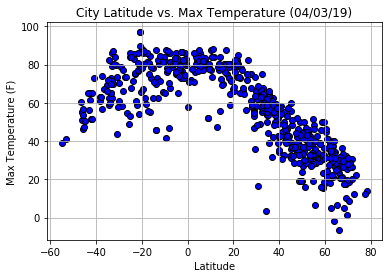

<Figure size 432x288 with 0 Axes>

In [84]:
#plot against maximum temperature
plt.scatter(x,y_temp, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig('Lat_vs_MTemp')

#### Latitude vs. Humidity Plot

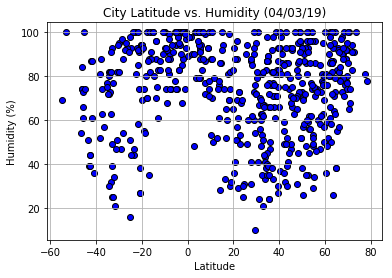

<Figure size 432x288 with 0 Axes>

In [89]:
#plot against humidity.. sometimes, I was getting 'valueerror: error x and y must be the same size'
# however, they are same size; 561 each 
plt.scatter(x,y_hum, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig('Lat_vs_Hum')

#### Latitude vs. Cloudiness Plot

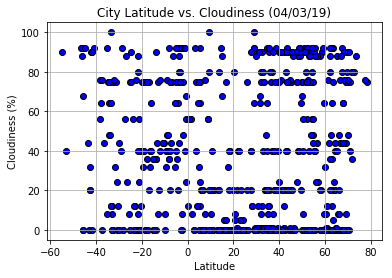

<Figure size 432x288 with 0 Axes>

In [90]:
#plot against cloudiness
plt.scatter(x,y_cloud, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig('Lat_vs_Cloud')

#### Latitude vs. Wind Speed Plot

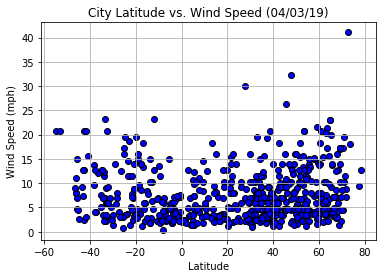

<Figure size 432x288 with 0 Axes>

In [91]:
#plot against windspeed
plt.scatter(x,y_wind, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.savefig('Lat_vs_Wind')